📊 Desafio 63 — Análise de Performance de Lojas

📂 Dataset: dia_63_vendas_lojas.csv
O conjunto de dados contém registros de vendas mensais de diferentes lojas, incluindo localidade, número de funcionários, tipo de loja, e total de vendas.

🔍 Tarefas:

Qual loja teve a maior média de vendas no ano?
Agrupe por loja e calcule a média total de vendas.

Há relação entre número de funcionários e total de vendas?
Gere uma análise de correlação ou scatter plot.

Crie um gráfico de barras mostrando o total de vendas por tipo de loja.

Treine um modelo de regressão para prever o total de vendas com base nas demais variáveis.
Sugestões:

Use LinearRegression do sklearn.

Separe os dados com train_test_split.

Avalie com mean_squared_error ou r2_score.

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("dia_63_vendas_lojas.csv")
df.head()

,Loja,Mês,Funcionários,Tipo_Loja,Vendas_Totais
0,Loja A,Jan,15,Shopping,25000
1,Loja B,Jan,10,Centro,18000
2,Loja C,Jan,8,Bairro,12000
3,Loja A,Fev,16,Shopping,27000
4,Loja B,Fev,11,Centro,19000


Tipo_Loja
Bairro      12750.0
Centro      18250.0
Shopping    26500.0
Name: Vendas_Totais, dtype: float64


<Axes: xlabel='Tipo_Loja', ylabel='Vendas_Totais'>

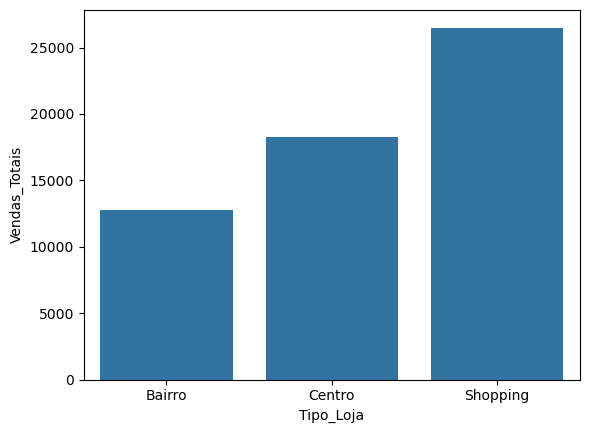

In [15]:
#Qual loja teve a maior média de vendas no ano? Agrupe por loja e calcule a média total de vendas.
loja_media_vendas = df.groupby("Tipo_Loja")["Vendas_Totais"].mean()
print(loja_media_vendas)

0.9738675871608976


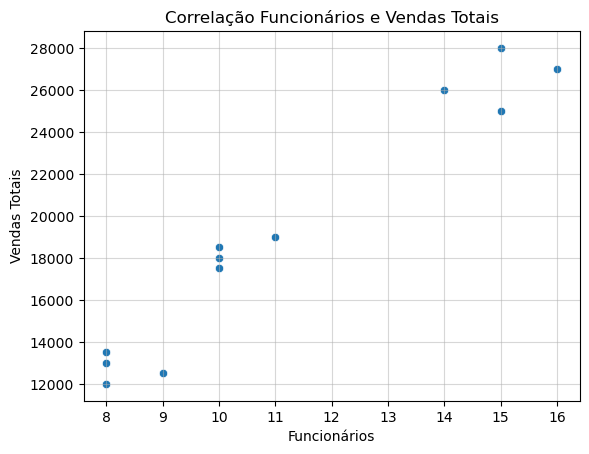

In [23]:
#Há relação entre número de funcionários e total de vendas? Gere uma análise de correlação ou scatter plot.
corr_funcionarios_vendas = df["Funcionários"].corr(df["Vendas_Totais"])
print(corr_funcionarios_vendas)

sns.scatterplot(df, x="Funcionários", y="Vendas_Totais")
plt.title("Correlação Funcionários e Vendas Totais")
plt.xlabel("Funcionários")
plt.ylabel("Vendas Totais")
plt.grid(alpha=0.5)
plt.show()

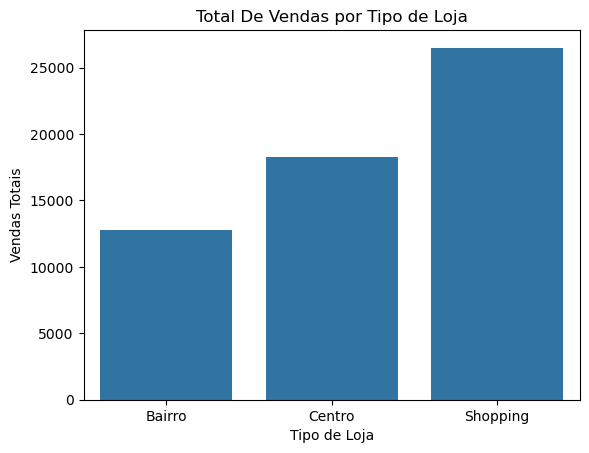

In [21]:
#Crie um gráfico de barras mostrando o total de vendas por tipo de loja.
sns.barplot(loja_media_vendas)
plt.title("Total De Vendas por Tipo de Loja")
plt.ylabel("Vendas Totais")
plt.xlabel("Tipo de Loja")
plt.show()

In [32]:
#Treine um modelo de regressão para prever o total de vendas com base nas demais variáveis.
df_dummies = pd.get_dummies(df, drop_first=True)

X = df_dummies.drop(["Vendas_Totais"], axis=1)
y= df_dummies["Vendas_Totais"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(r2)
print(mse)

0.9693205574912893
1100624.9999999972
